# Iris Flower Classification using Machine Learning

The **Iris dataset** is a classic machine learning dataset introduced by Ronald Fisher in 1936. It includes 150 samples from three iris species (*Iris-setosa*, *Iris-versicolor*, and *Iris-virginica*) and provides four features per sample:

- Sepal length (cm)
- Sepal width (cm)
- Petal length (cm)
- Petal width (cm)

### Project Objectives:
- To conduct **Exploratory Data Analysis (EDA)** to understand feature distributions and make preliminary observations on the data.
- Build machine learning models to classify iris species.
- Apply **hyperparameter tuning** to improve model performance.
- Evaluate the model using metrics such as **accuracy, precision, recall, and F1-score**

## Load Data

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [108]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
iris = fetch_ucirepo(id=53) 

iris_dat = iris.data.original

## Exploratory Data Analysis

We will perform basic statistics and visualizations to explore the relationships between features and the target class.

- Check for missing values
- Visualize distributions of each feature
- Create a **pairplot** to observe class separability
- Analyze feature importance intuitively

In [51]:
iris_dat.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [53]:
print("Info: ")
iris_dat.info()

Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [55]:
iris_dat.isna().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

No missing values

In [58]:
iris_dat.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [60]:
iris_dat

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Visualizations

In [65]:
iris_dat["class"].value_counts()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

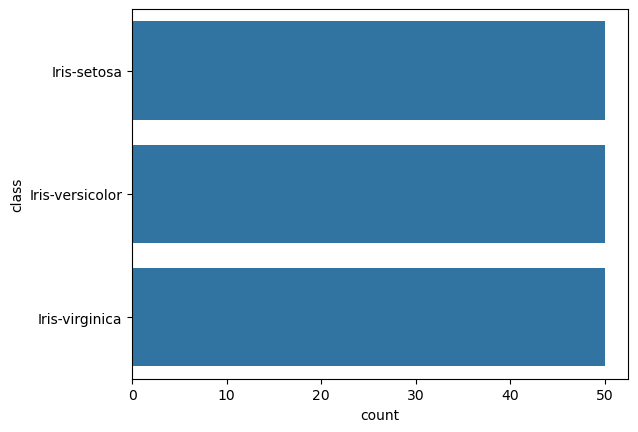

In [77]:
sns.countplot(iris_dat["class"])
plt.show()

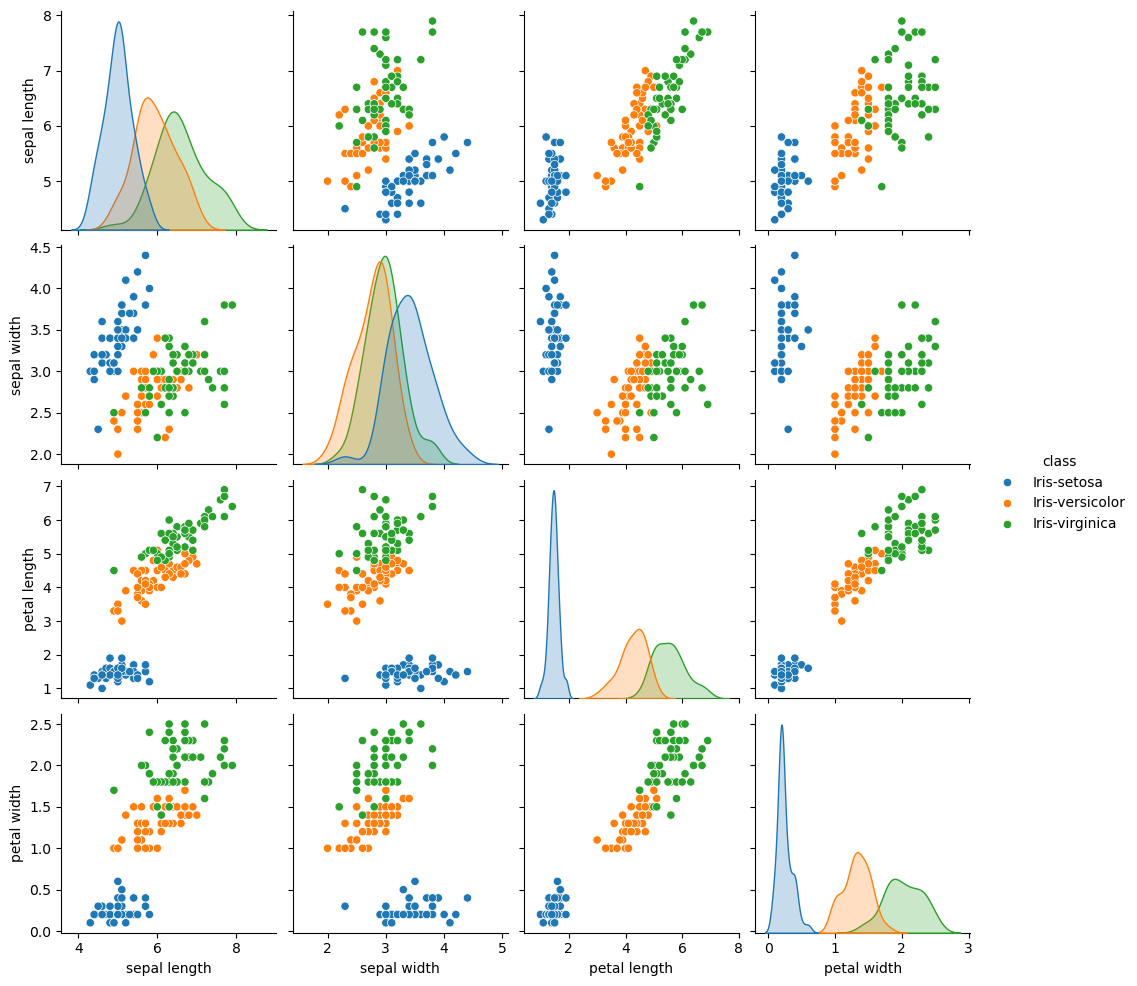

In [79]:
sns.pairplot(iris_dat, hue='class')
plt.show()

### Interpretation

The diagonal plots are **KDE Plots** that show the estimated distribution of individual features. <br>
- The `petal length` and `petal width` plots show clear distribution between classes, especially for **Iris-setosa**.
- `sepal length` and `sepal width` have overlapping distributions.

The off-diagonal scatter plots show the relationships between two features. 
- `petal length` vs `petal width`: clear clustering of all three classes.
- `petal length` vs `sepal length`: also good separation.
- `petal width` and `sepal length`: decent separation.

#### Insights:
- petal features as the most informative for classifying iris species.
- **Iris-setosa** is very easily separable from the other two species, whereas the other two species have some overlap.

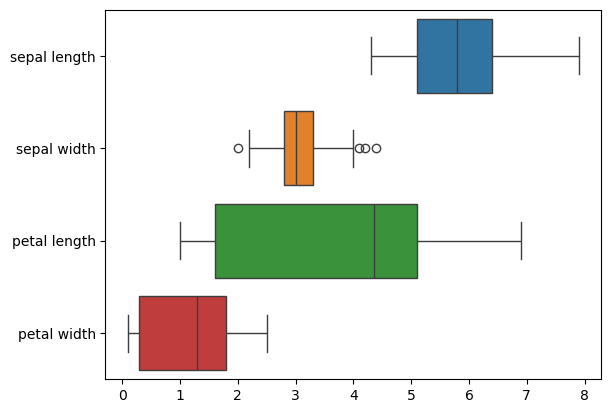

In [81]:
sns.boxplot(data=iris_dat, orient="h")
plt.show()

## Split Data into Training and Test Sets

We'll encode the target labels from string categories to numerical values using `LabelEncoder` and split the data into training and test sets.

In [231]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#Create separate dataframes for features and target variables
le = LabelEncoder()
y_enc = le.fit_transform( iris_dat["class"])
X = iris_dat.iloc[:,:4]

X_train, X_test,y_train, y_test = train_test_split(X,y_enc,test_size = 0.2,random_state=22)

In [233]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


## Creating the Model
We'll train the following models:
- Logistic Regression
- Support Vector Machine (SVM)
- Random Forest

Each model will be trained on the training set and evaluated on the test set using accuracy and a classification report.

In [236]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [238]:
# Logistic Regression
logistic = LogisticRegression()
logistic.fit(X_train,y_train)
log_pred = logistic.predict(X_test)
print(f"Logistic Regression Accuracy: {accuracy_score(y_test,log_pred):.3f}")
print(classification_report(y_test,log_pred))

Logistic Regression Accuracy: 0.933
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.83      1.00      0.91        10
           2       1.00      0.86      0.92        14

    accuracy                           0.93        30
   macro avg       0.94      0.95      0.94        30
weighted avg       0.94      0.93      0.93        30



In [269]:
#Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
print(f"Random Forest Classifier accuracy: {accuracy_score(y_test,rf_pred):.3f}")
print(classification_report(y_test,rf_pred))

Random Forest Classifier accuracy: 0.933
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.83      1.00      0.91        10
           2       1.00      0.86      0.92        14

    accuracy                           0.93        30
   macro avg       0.94      0.95      0.94        30
weighted avg       0.94      0.93      0.93        30



In [242]:
#Support Vector Machine
svm = SVC()
svm.fit(X_train,y_train)
svm_pred = svm.predict(X_test)
print(f"Support Vector Machine accuracy: {accuracy_score(y_test,svm_pred):.3f}")
print(classification_report(y_test,svm_pred))

Support Vector Machine accuracy: 0.900
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.77      1.00      0.87        10
           2       1.00      0.79      0.88        14

    accuracy                           0.90        30
   macro avg       0.92      0.93      0.92        30
weighted avg       0.92      0.90      0.90        30



Both Random Forest and Logistic Regression yield the same accuracy of **93.3%**. Let us consider Random Forest as the best model.

## Hyperparameter Tuning

We'll tune the hyperparameters of our best performing models using **GridSearchCV**. We'll compare the tuned model performance to our baseline.

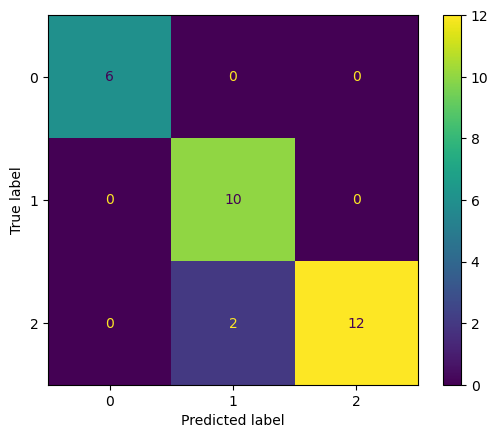

In [275]:
#Hyperparameter tuning
ConfusionMatrixDisplay.from_estimator(rf,X_test,y_test)
plt.show()

In [256]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],            # Number of trees
    'max_depth': [None, 5, 10, 20],            # Max depth of each tree
    'min_samples_split': [2, 5, 10],           # Min samples to split a node
    'min_samples_leaf': [1, 2, 4],             # Min samples at a leaf node
    'bootstrap': [True, False]                 # Whether to use bootstrap samples
}

grid_search = GridSearchCV(estimator = rf, param_grid=param_grid, cv = 5, scoring="accuracy", n_jobs = -1, verbose = 2)

In [254]:
grid_search.fit(X_train,y_train)
print("Best Parameters: ", grid_search.best_params_)
print("Best Cross-Validation Accuracy: ", grid_search.best_score_)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred, target_names = le.classes_))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters:  {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-Validation Accuracy:  0.9666666666666668
Test Accuracy: 0.9333333333333333
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         6
Iris-versicolor       0.83      1.00      0.91        10
 Iris-virginica       1.00      0.86      0.92        14

       accuracy                           0.93        30
      macro avg       0.94      0.95      0.94        30
   weighted avg       0.94      0.93      0.93        30



- **Best Parameters:**  {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
- **Best Cross-Validation Accuracy:**  0.966666666666666- 
**Test Accuracy**  0.9333333333333333

In [279]:
#Feature importance
importances = best_rf.feature_importances_
feature_names = X.columns

feat_imp_df = pd.DataFrame({
    'Feature':feature_names,
    'Importance':importances
}).sort_values(by="Importance",ascending=False)
print(feat_imp_df)

        Feature  Importance
2  petal length    0.489138
3   petal width    0.423625
0  sepal length    0.067851
1   sepal width    0.019385


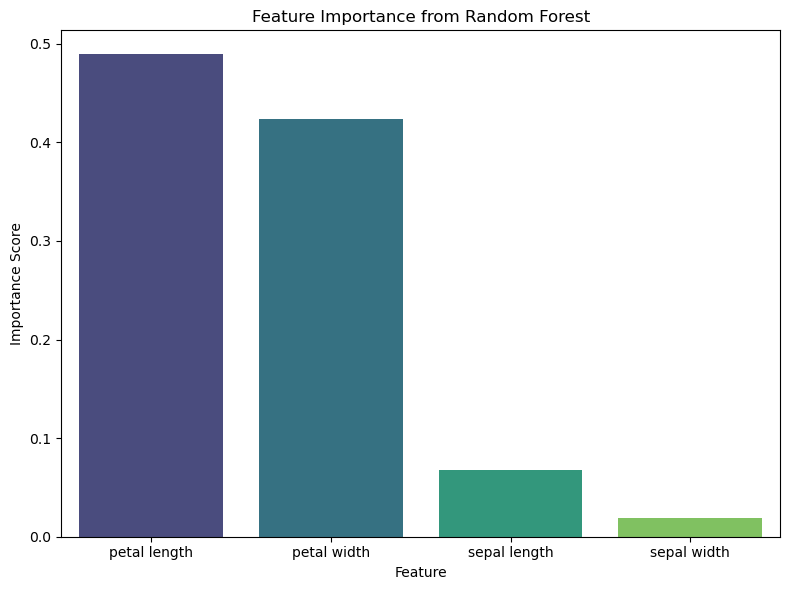

In [287]:
plt.figure(figsize=(8,6))
sns.barplot(x="Feature",y="Importance",data=feat_imp_df,hue='Feature',palette = 'viridis',legend=False)
plt.title("Feature Importance from Random Forest")
plt.ylabel("Importance Score")
plt.xlabel("Feature")
plt.tight_layout()
plt.show()

## Conclusion

In this project, we successfully built and evaluated multiple models to classify iris flower species. We identified that **petal length and width** are the most important features for distinguishing between species. Our best model (e.g., Random Forest) achieved high accuracy and generalization performancs.

## Author

Janhavi Tamhankar

Connect with me on [Linkedin](https://www.linkedin.com/in/janhavitamhankar/)!